In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [24]:
Y_train

array([0, 1, 3, ..., 5, 5, 0], dtype=int64)

In [27]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10,1) - 0.5
    W2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10,1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z,0)

def softmax(Z):
    e_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))  # For numerical stability
    return e_Z / np.sum(e_Z, axis=0, keepdims=True)

def forward_prop(W1,b1,W2,b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot_encoding(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() +1 ))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def derivative_ReLU(Z):
    return Z > 0

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot_encoding(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True) 
    dZ1 = W2.T.dot(dZ2) * derivative_ReLU(Z1)
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [29]:
def get_predictions(A2):
    return np.argmax(A2,0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations,alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [31]:
W1, b1, W2, b2 = gradient_descent(X_train,Y_train, 1000, 0.1)

Iteration:  0
[9 9 2 ... 9 9 1] [0 1 3 ... 5 5 0]
0.10302439024390243
Iteration:  10
[3 9 3 ... 5 0 0] [0 1 3 ... 5 5 0]
0.18326829268292683
Iteration:  20
[0 6 3 ... 5 0 0] [0 1 3 ... 5 5 0]
0.30434146341463414
Iteration:  30
[0 1 3 ... 5 0 0] [0 1 3 ... 5 5 0]
0.41060975609756095
Iteration:  40
[0 1 3 ... 5 0 0] [0 1 3 ... 5 5 0]
0.4817560975609756
Iteration:  50
[0 1 3 ... 5 0 0] [0 1 3 ... 5 5 0]
0.5356829268292683
Iteration:  60
[0 1 3 ... 5 0 0] [0 1 3 ... 5 5 0]
0.5839268292682926
Iteration:  70
[0 1 3 ... 5 0 0] [0 1 3 ... 5 5 0]
0.6191463414634146
Iteration:  80
[0 1 3 ... 5 0 0] [0 1 3 ... 5 5 0]
0.6509512195121951
Iteration:  90
[0 1 3 ... 5 0 0] [0 1 3 ... 5 5 0]
0.6758048780487805
Iteration:  100
[0 1 3 ... 5 0 0] [0 1 3 ... 5 5 0]
0.6942439024390243
Iteration:  110
[0 1 3 ... 5 0 0] [0 1 3 ... 5 5 0]
0.7100731707317073
Iteration:  120
[0 1 3 ... 5 0 0] [0 1 3 ... 5 5 0]
0.7242926829268292
Iteration:  130
[0 1 3 ... 5 0 0] [0 1 3 ... 5 5 0]
0.7361707317073171
Iteration:  1

In [34]:
def make_predictions(X,W1,b1,W2,b2):
    _,_,_,A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2) 
    label = Y_train[index]
    print('Prediction: ', prediction)
    print('Label: ', label)

    current_image = current_image.reshape((28,28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()


Prediction:  [8]
Label:  8


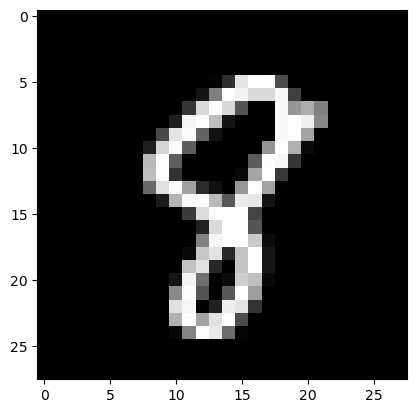

In [44]:
test_prediction(5, W1, b1, W2, b2)

In [43]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[5 6 4 3 9 3 4 1 4 0 1 2 5 3 9 8 5 1 2 1 2 4 6 1 4 7 6 1 3 0 6 1 3 6 1 4 8
 8 2 8 4 7 5 9 6 4 7 8 5 0 4 6 4 8 8 1 7 6 8 5 3 2 2 0 5 4 7 4 9 9 7 4 3 0
 3 3 3 5 3 1 8 7 1 2 1 5 8 9 6 4 2 2 1 9 9 4 1 3 1 0 9 7 6 7 7 6 8 6 4 4 6
 7 9 3 6 9 3 3 0 7 9 4 5 9 8 2 7 8 0 0 1 4 6 4 0 5 9 0 3 3 2 2 2 7 4 8 6 9
 5 2 6 0 7 2 0 5 7 8 9 0 4 9 3 2 6 4 0 9 2 1 6 2 6 8 3 7 5 7 3 1 9 5 9 2 7
 3 9 3 4 7 0 8 1 0 1 8 1 9 6 7 8 8 7 9 1 8 2 3 6 6 6 9 5 3 8 5 1 1 4 1 4 6
 0 6 0 3 3 7 2 0 3 1 8 0 4 4 1 3 4 1 3 1 5 2 7 0 1 4 1 2 3 2 6 8 9 2 5 9 1
 5 5 2 8 2 5 9 9 6 9 0 3 2 3 3 6 8 3 7 8 2 0 6 4 1 5 7 0 3 7 6 1 3 3 1 2 5
 8 4 6 1 1 7 9 0 7 7 0 0 9 3 3 7 5 8 9 0 3 9 6 0 7 1 8 2 7 6 3 7 4 4 5 4 2
 0 2 1 1 4 3 5 8 0 7 2 5 3 0 6 7 5 0 2 6 2 8 8 3 5 3 2 6 7 9 0 0 3 9 6 5 6
 3 5 8 2 8 1 4 4 6 7 8 9 7 7 2 0 4 9 3 9 3 8 2 2 4 8 2 9 4 4 6 7 5 9 2 2 4
 0 1 3 8 9 6 7 4 0 8 5 4 7 4 1 9 3 1 7 6 4 4 6 8 3 8 0 2 4 0 9 0 0 6 0 2 1
 4 5 9 7 2 2 1 9 6 2 3 2 9 7 1 1 9 8 2 7 2 4 9 8 0 9 8 5 2 3 7 1 1 4 2 0 7
 2 9 2 1 0 1 2 8 4 1 2 3 

0.885